Importing dataset and looking at the data

In [27]:
import pandas as pd

dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') # Load the dataset

dataset.head()
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Transforming 'TotalCharges' from object to Numeric

In [28]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce') # Convert 'TotalCharges' to numeric, coercing errors
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Creating 3 tests to see which one is better

In [29]:
df_drop = dataset.copy() 
df_fill = dataset.copy()
df_zero = dataset.copy()

Test 1 : Removing NaN values

In [30]:
print("original format of df_drop:", df_drop.shape) 
df_drop.dropna(inplace=True) # Drop rows with any NaN values
print("after dropna format of df_drop:", df_drop.shape)

original format of df_drop: (7043, 21)
after dropna format of df_drop: (7032, 21)


Test 2: Filling NaN values with the mean of 'TotalCharges'

In [31]:
print("Original format of df_fill:", df_fill.shape)
mean_values = df_fill['TotalCharges'].mean() 
df_fill['TotalCharges'] = df_fill['TotalCharges'].fillna(mean_values) # Fill NaN values with the mean of 'TotalCharges'
print("After fillna format of df_fill:", df_fill.shape)
df_fill.info()




Original format of df_fill: (7043, 21)
After fillna format of df_fill: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contrac

Test 3: Filling the NaN values with 0

In [32]:
print("Original format of df_zero:", df_zero.shape)
df_zero['TotalCharges'] = df_zero['TotalCharges'].fillna(0) # Fill NaN values with 0
print("After fillna with zero format of df_zero:", df_zero.shape)

Original format of df_zero: (7043, 21)
After fillna with zero format of df_zero: (7043, 21)


Creating a train and evaluation function

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def train_and_evaluate(dataframe):
    # Selecting numerical and categorical features
    X_num = dataframe.select_dtypes(include=['int64', 'float64'])
    X_cat = dataframe.select_dtypes(include=['object']).drop(columns=['Churn', 'customerID'])
    # Encoding categorical variables
    X_cat_encoded = pd.get_dummies(X_cat, drop_first=True)

    # Combining numerical and categorical features
    X = pd.concat([X_num, X_cat_encoded], axis=1)
    # Target variable
    y = dataframe['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) # Convert 'Churn' to binary (1 for 'Yes', 0 for 'No')

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 75% training and 25% testing

    # Standardizing the features
    SC = StandardScaler() 
    X_train = SC.fit_transform(X_train)
    X_test = SC.transform(X_test)

    # Initializing and training the logistic regression classifier
    classifier = LogisticRegression(max_iter=1000)
    classifier.fit(X_train, y_train)

   
    # Making predictions
    y_pred = classifier.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy



Accuracy test to see which one is better

In [34]:
#print(f"Accuracy score of df_drop: {train_and_evaluate(df_drop)}") 
#print(f"Accuracy score of df_fill: {train_and_evaluate(df_fill)}")
print(f"Accuracy score of df_zero: {train_and_evaluate(df_zero)}")
# The code above trains and evaluates a logistic regression model on three different datasets:

Accuracy score of df_zero: 0.8126064735945485


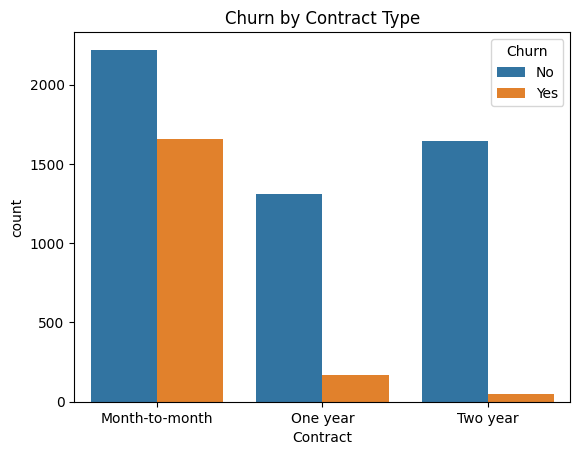

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Contract', hue='Churn', data=df_zero)
plt.title('Churn by Contract Type')
plt.show()

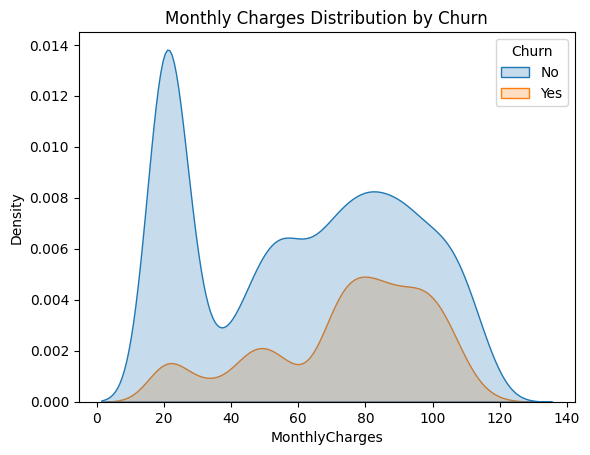

In [36]:
sns.kdeplot(data=df_zero, x='MonthlyCharges', hue='Churn', fill=True)
plt.title('Monthly Charges Distribution by Churn')
plt.show()

In [37]:
final_df = df_zero.copy()

X_num = final_df.select_dtypes(include=['int64', 'float64'])
X_cat = final_df.select_dtypes(include=['object']).drop(columns=['Churn', 'customerID'])
y_final = final_df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
# Encoding categorical variables
X_final_encoded = pd.get_dummies(X_cat, drop_first=True)


In [38]:
scaler_final = StandardScaler()
x_final_scaled = scaler_final.fit_transform(X_final_encoded)

final_model = LogisticRegression(random_state=42)
final_model.fit(x_final_scaled, y_final)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [46]:
churn_probabilities = final_model.predict_proba(x_final_scaled)[:, 1] # Get probabilities for the positive class (Churn = Yes)

# creating the report DataFrame
report_df = pd.DataFrame({
    'customerID': final_df['customerID'],
    'Churn_Probability': churn_probabilities*100
}).sort_values(by='Churn_Probability', ascending=False)

print("Report of customers with churn probabilities(top 20)")
report_df.head(20)

Report of customers with churn probabilities(top 20)


,customerID,Churn_Probability
3209,8149-RSOUN,74.764890
3229,5519-NPHVG,74.764890
1359,7943-RQCHR,74.764890
1360,3793-MMFUH,74.764890
997,1374-DMZUI,74.764890
1238,5565-FILXA,74.764890
301,8098-LLAZX,74.764890
1725,5935-FCCNB,74.764890
3545,6212-ATMLK,74.764890
4307,6899-PPEEA,74.764890
